## Linear Regression Model

#### 필요 모듈 불러오기

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression as LR
from matplotlib import pyplot as plt

#### 가상 데이터 생성

In [2]:
X = np.linspace(-5, 10, 500) # -5부터 10까지 등간격으로 500개의 요소를 갖는 벡터
X_2 = X ** 2 # X_2: X의 모든 요소에 제곱이 된 형태 (참고: 유니버설 함수와 브로드캐스팅)

# Y = 3X^2 + e
Y = 3 * X ** 2 + np.random.normal(0, 4, size = len(X)) # Y는 X^2을 바탕으로 생성함 (즉, X와 Y는 자연스레 2차식 관계가 존재)

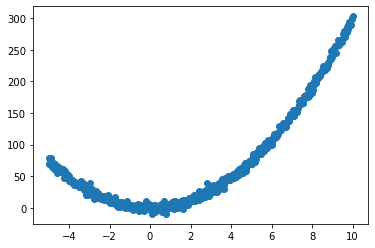

In [3]:
plt.scatter(X, Y)

직선으로 fittting이 불가능. feature transformation이 필요. 

#### 모델 학습

In [6]:
X.reshape(-1, 1)[:3]

array([[-5.        ],
       [-4.96993988],
       [-4.93987976]])

In [7]:
# X는 1차원이어서 sklearn의 인풋 구조와 맞지 않아, reshape를 사용함
# .fit(X, Y) => X = [[record1], [record2], ..., [record n]]
# 1차원: X = [record1, record2, ..., record n]

model_1 = LR().fit(X.reshape(-1, 1), Y) 
# model_1: X를 특징을 그대로 사용한 모델

model_2 = LR().fit(X_2.reshape(-1, 1), Y) 
# model_2: X의 제곱을 특징으로 사용한 모델

#### 모델 적용

In [8]:
model_1_Y = model_1.predict(X.reshape(-1, 1))
model_2_Y = model_2.predict(X_2.reshape(-1, 1)) 
# model_2의 입력도 제곱으로 들어감에 주의

#### 결과 시각화 

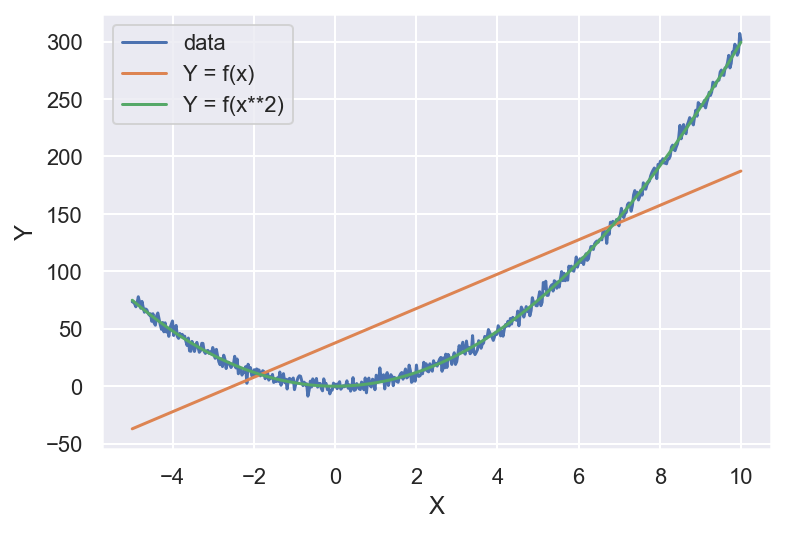

In [9]:
%matplotlib inline
plt.xlabel("X")
plt.ylabel("Y") # x축과 y축의 이름 설정

plt.plot(X, Y, label = "data")
plt.plot(X, model_1_Y, label = "Y = f(x)")
plt.plot(X, model_2_Y, label = "Y = f(x**2)")

plt.legend(loc = 'upper left')

## Logistic Regression Model

#### 필요 모듈 불러오기

In [11]:
import numpy as np
from sklearn.linear_model import LogisticRegression as LR
from matplotlib import pyplot as plt

#### 가상 데이터 생성

In [12]:
X = np.random.random(size = 10).tolist() + (np.random.random(size = 10) + 1).tolist() + (np.random.random(size = 10) + 2).tolist()
Y = [0] * 9 + [1] * 1 + [0] * 2 + [1] * 8 + [0] * 9 + [1] * 1

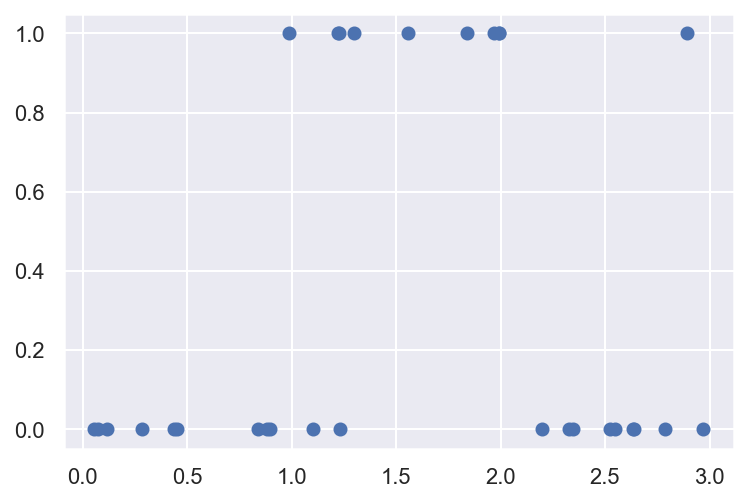

In [15]:
plt.scatter(X, Y)

In [16]:
X = np.array(X)
Y = np.array(Y)

# np.logical_and : 두 bool이 true면 true를 반환. 아니면 false를 밚환
cond = np.logical_and(X > 1, X <= 2)

X_tilda = X.copy()

# X_tilda = X => 사본이 아니라 view를 반환하기 때문. 
X_tilda[cond] = 1
X_tilda[~cond] = 0

In [17]:
X_tilda

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

#### 모델 학습

In [18]:
# X는 1차원이어서 sklearn의 인풋 구조와 맞지 않아, reshape를 사용함

model_1 = LR().fit(X.reshape(-1, 1), Y) # model_1: X를 특징을 그대로 사용한 모델
model_2 = LR().fit(X_tilda.reshape(-1, 1), Y) # model_2: 변환한 특징을 사용한 모델

#### 결과 시각화 

In [19]:
%matplotlib inline

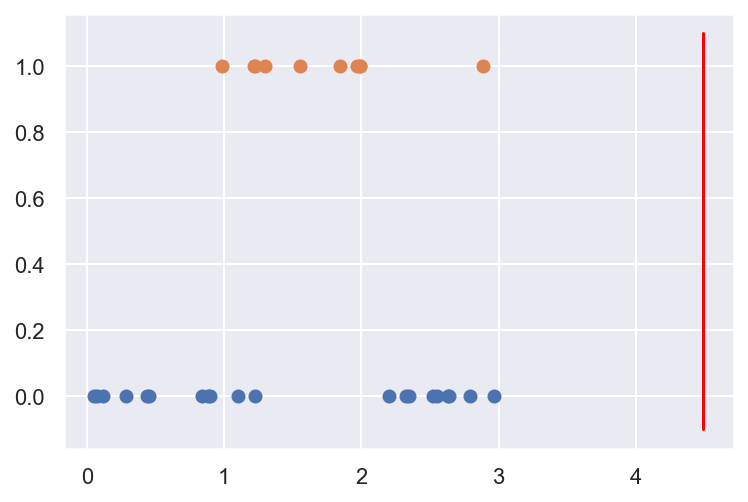

In [20]:
# decision boundary 유도
# Pr(y = 1 | x) >= 0.5
# <=> 1 / (1 + exp(-coef * x - intercept)) >= 0.5
# <=> (1 + exp(-coef * x - intercept)) <= 2
# <=> exp(-coef * x - intercept) <= 1
# <=> -coef * x - intercept <= 0
# <=> x >= - intercept / coef

decision_boundary = (- model_1.intercept_[0] / model_1.coef_[0])
plt.plot([decision_boundary, decision_boundary], [-0.1, 1.1], color = 'red')
plt.scatter(X[Y == 0], Y[Y == 0])
plt.scatter(X[Y == 1], Y[Y == 1])

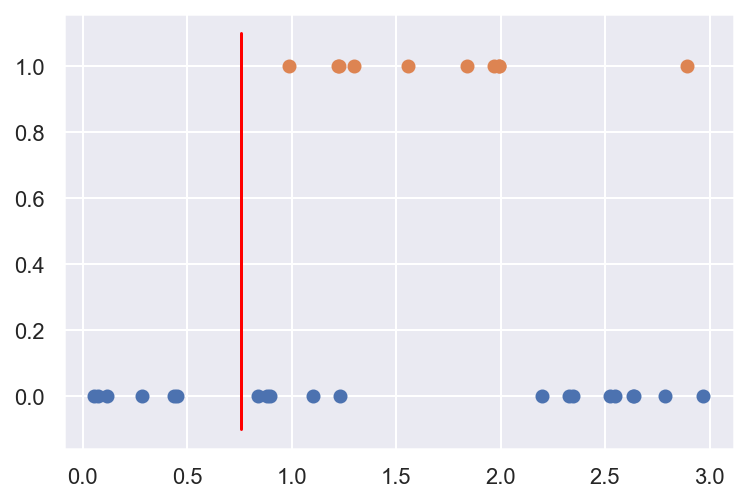

In [21]:
decision_boundary = (- model_2.intercept_[0] / model_2.coef_[0])
plt.plot([decision_boundary, decision_boundary], [-0.1, 1.1], color = 'red')
plt.scatter(X[Y == 0], Y[Y == 0])
plt.scatter(X[Y == 1], Y[Y == 1])